<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [0]:
drive.mount('./data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./data


In [0]:
df = pd.read_excel('./data/My Drive/ML_training/SF_Workload_estimation1.0.xlsx')

In [0]:
df['functions'] = df['QUERY_TEXT'].str.findall('[A-Za-z]+\(.+\)')

In [0]:
df['number_of_function'] = df['functions'].str.len()

In [0]:
df

,QUERY_ID,QUERY_TEXT,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,WAREHOUSE_SIZE,QRY_WAREHOUSE_SIZE,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,START_TIME,QRY_END_TIME,QUERY_TAG,QUERY_TYPE,USER_NAME,SESSION_ID,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,functions,number_of_function
0,018ed8ac-00eb-2a8f-0000-0583001b0b6a,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,549,0.549,979,0.979,2019-09-12 15:36:41.226 -0700,2019-09-12 15:36:42.205 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199609206,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1
1,018ed071-00d0-4c19-0000-05830019b462,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,26524,26.524,29977,29.977,2019-09-11 04:29:55.398 -0700,2019-09-11 04:30:25.375 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199587914,SUCCESS,3.710218e+10,1.000000e+07,NaN,0,"[substring(COMMENT_TXT,1,4000)]",1
2,018ef0ef-009d-9251-0000-05830026a0ae,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,572,0.572,1291,1.291,2019-09-16 23:07:52.364 -0700,2019-09-16 23:07:53.655 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643698,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1
3,018eec94-009f-f0c8-0000-05830024586a,insert into BIZ_USER_DB.TERMINUS_BIZ_APP.its_s...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,35672,35.672,38342,38.342,2019-09-16 04:32:31.730 -0700,2019-09-16 04:33:10.072 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643666,SUCCESS,1.225716e+11,1.000000e+09,NaN,0,"[substr(REGRANT_ERROR_TXT,1,50)]",1
4,018eec53-0039-3c3b-0000-058300244732,insert into BIZ_USER_DB.TERMINUS_BIZ_APP.Its_c...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,4707,4.707,6871,6.871,2019-09-16 03:27:40.613 -0700,2019-09-16 03:27:47.484 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643666,SUCCESS,1.182197e+09,3.900000e+06,NaN,0,"[substr(NOTES_TXT,1,4000), substr(ADDON_RCPT_S...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,018ed68f-0031-856e-0000-0583001abb9e,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,242,0.242,558,0.558,2019-09-12 06:35:52.935 -0700,2019-09-12 06:35:53.493 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199613370,SUCCESS,NaN,NaN,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1
57,018ed695-00ff-18a1-0000-0583001aabbe,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,486,0.486,1345,1.345,2019-09-12 06:41:23.412 -0700,2019-09-12 06:41:24.757 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199629690,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1
58,018ed693-0042-359d-0000-0583001a7be6,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,554,0.554,1069,1.069,2019-09-12 06:39:10.328 -0700,2019-09-12 06:39:11.397 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199621502,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1
59,018ed68a-0008-72b5-0000-0583001a8bba,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,28,ETL_HIGH_4XL_WH_2,4X-Large,4X-Large,1,133,0.133,704,0.704,2019-09-12 06:30:50.607 -0700,2019-09-12 06:30:51.311 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199609150,SUCCESS,NaN,NaN,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",1


In [0]:
mod_df = df.drop(['QUERY_ID',	'QUERY_TEXT','WAREHOUSE_SIZE'	,'QRY_WAREHOUSE_SIZE','START_TIME','QRY_END_TIME','SESSION_ID','functions','USER_NAME'],axis = 1)

In [0]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TAG,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,number_of_function
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,NaN,INSERT,SUCCESS,3.710218e+10,1.000000e+07,NaN,0,1
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,NaN,INSERT,SUCCESS,1.225716e+11,1.000000e+09,NaN,0,1
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,NaN,INSERT,SUCCESS,1.182197e+09,3.900000e+06,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,242,0.242,558,0.558,NaN,INSERT,SUCCESS,NaN,NaN,NaN,0,1
57,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,486,0.486,1345,1.345,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,NaN,INSERT,SUCCESS,NaN,NaN,NaN,0,1


In [0]:
mod_df['EXECUTION_STATUS'] = mod_df[mod_df.EXECUTION_STATUS == 'SUCCESS']

In [0]:
mod_df.drop('EXECUTION_STATUS',axis = 1)

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TAG,QUERY_TYPE,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,number_of_function
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,NaN,INSERT,3.710218e+10,1.000000e+07,NaN,0,1
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,NaN,INSERT,1.225716e+11,1.000000e+09,NaN,0,1
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,NaN,INSERT,1.182197e+09,3.900000e+06,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,242,0.242,558,0.558,NaN,INSERT,NaN,NaN,NaN,0,1
57,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,486,0.486,1345,1.345,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,NaN,INSERT,NaN,NaN,NaN,0,1


In [0]:
mod_df.isna().sum()

DERIVED_WH                               0
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)     0
WAREHOUSE_ID                             0
WAREHOUSE_NAME                           0
CLUSTER_NUMBER                           0
EXECUTION_TIME                           0
EXECUTION_SEC                            0
TOTAL_ELAPSED_TIME                       0
TOTAL_ELAPSED_SEC                        0
QUERY_TAG                               60
QUERY_TYPE                               0
EXECUTION_STATUS                         0
BYTES_SCANNED                            5
ROWS_PRODUCED                            5
Rows_Bucket                             61
INBOUND_DATA_TRANSFER_BYTES              0
number_of_function                       0
dtype: int64

In [0]:
mod_df.drop(['QUERY_TAG',"Rows_Bucket"],axis = 1,inplace=True)

In [0]:
mod_df.isna().sum()

DERIVED_WH                              0
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)    0
WAREHOUSE_ID                            0
WAREHOUSE_NAME                          0
CLUSTER_NUMBER                          0
EXECUTION_TIME                          0
EXECUTION_SEC                           0
TOTAL_ELAPSED_TIME                      0
TOTAL_ELAPSED_SEC                       0
QUERY_TYPE                              0
EXECUTION_STATUS                        0
BYTES_SCANNED                           5
ROWS_PRODUCED                           5
INBOUND_DATA_TRANSFER_BYTES             0
number_of_function                      0
dtype: int64

In [0]:
mod_df["BYTES_SCANNED"].fillna(0,inplace=True)

In [0]:
mod_df['ROWS_PRODUCED'].fillna(0,inplace=True)

In [0]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
DERIVED_WH                              61 non-null object
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)    61 non-null int64
WAREHOUSE_ID                            61 non-null int64
WAREHOUSE_NAME                          61 non-null object
CLUSTER_NUMBER                          61 non-null int64
EXECUTION_TIME                          61 non-null int64
EXECUTION_SEC                           61 non-null float64
TOTAL_ELAPSED_TIME                      61 non-null int64
TOTAL_ELAPSED_SEC                       61 non-null float64
QUERY_TYPE                              61 non-null object
EXECUTION_STATUS                        61 non-null object
BYTES_SCANNED                           61 non-null float64
ROWS_PRODUCED                           61 non-null float64
INBOUND_DATA_TRANSFER_BYTES             61 non-null int64
number_of_function                      61 non-null int64
dtypes: float64

In [0]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,INSERT,HIGH,3.710218e+10,1.000000e+07,0,1
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,INSERT,HIGH,1.225716e+11,1.000000e+09,0,1
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,INSERT,HIGH,1.182197e+09,3.900000e+06,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,242,0.242,558,0.558,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1
57,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,486,0.486,1345,1.345,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1


In [0]:
d = defaultdict(LabelEncoder)
# Encoding the variable
fit = mod_df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
mod_df = mod_df.apply(lambda x: d[x.name].transform(x))

In [0]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function
0,0,0,3,3,0,8,8,6,6,0,0,1,1,0,1
1,0,0,3,3,0,28,28,27,27,0,0,10,5,0,1
2,0,0,3,3,0,10,10,10,10,0,0,1,1,0,1
3,0,0,3,3,0,31,31,30,30,0,0,11,9,0,1
4,0,0,3,3,0,19,19,17,17,0,0,4,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,3,3,0,4,4,0,0,0,0,0,0,0,1
57,0,0,3,3,0,5,5,11,11,0,0,1,1,0,1
58,0,0,3,3,0,9,9,7,7,0,0,1,1,0,1
59,0,0,2,2,0,2,2,2,2,0,0,0,0,0,1


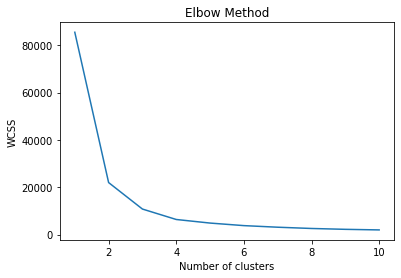

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mod_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(mod_df)

In [0]:
df_trans = fit.apply(lambda x: d[x.name].inverse_transform(x))

In [0]:
df_trans['cluster'] = y_kmeans 
df_trans

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function,cluster
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,INSERT,HIGH,3.710218e+10,1.000000e+07,0,1,3
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,INSERT,HIGH,1.225716e+11,1.000000e+09,0,1,3
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,INSERT,HIGH,1.182197e+09,3.900000e+06,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,242,0.242,558,0.558,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,2
57,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,486,0.486,1345,1.345,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,2


In [0]:
df_trans['cluster'].value_counts()

2    15
4    12
1    12
0    12
3    10
Name: cluster, dtype: int64

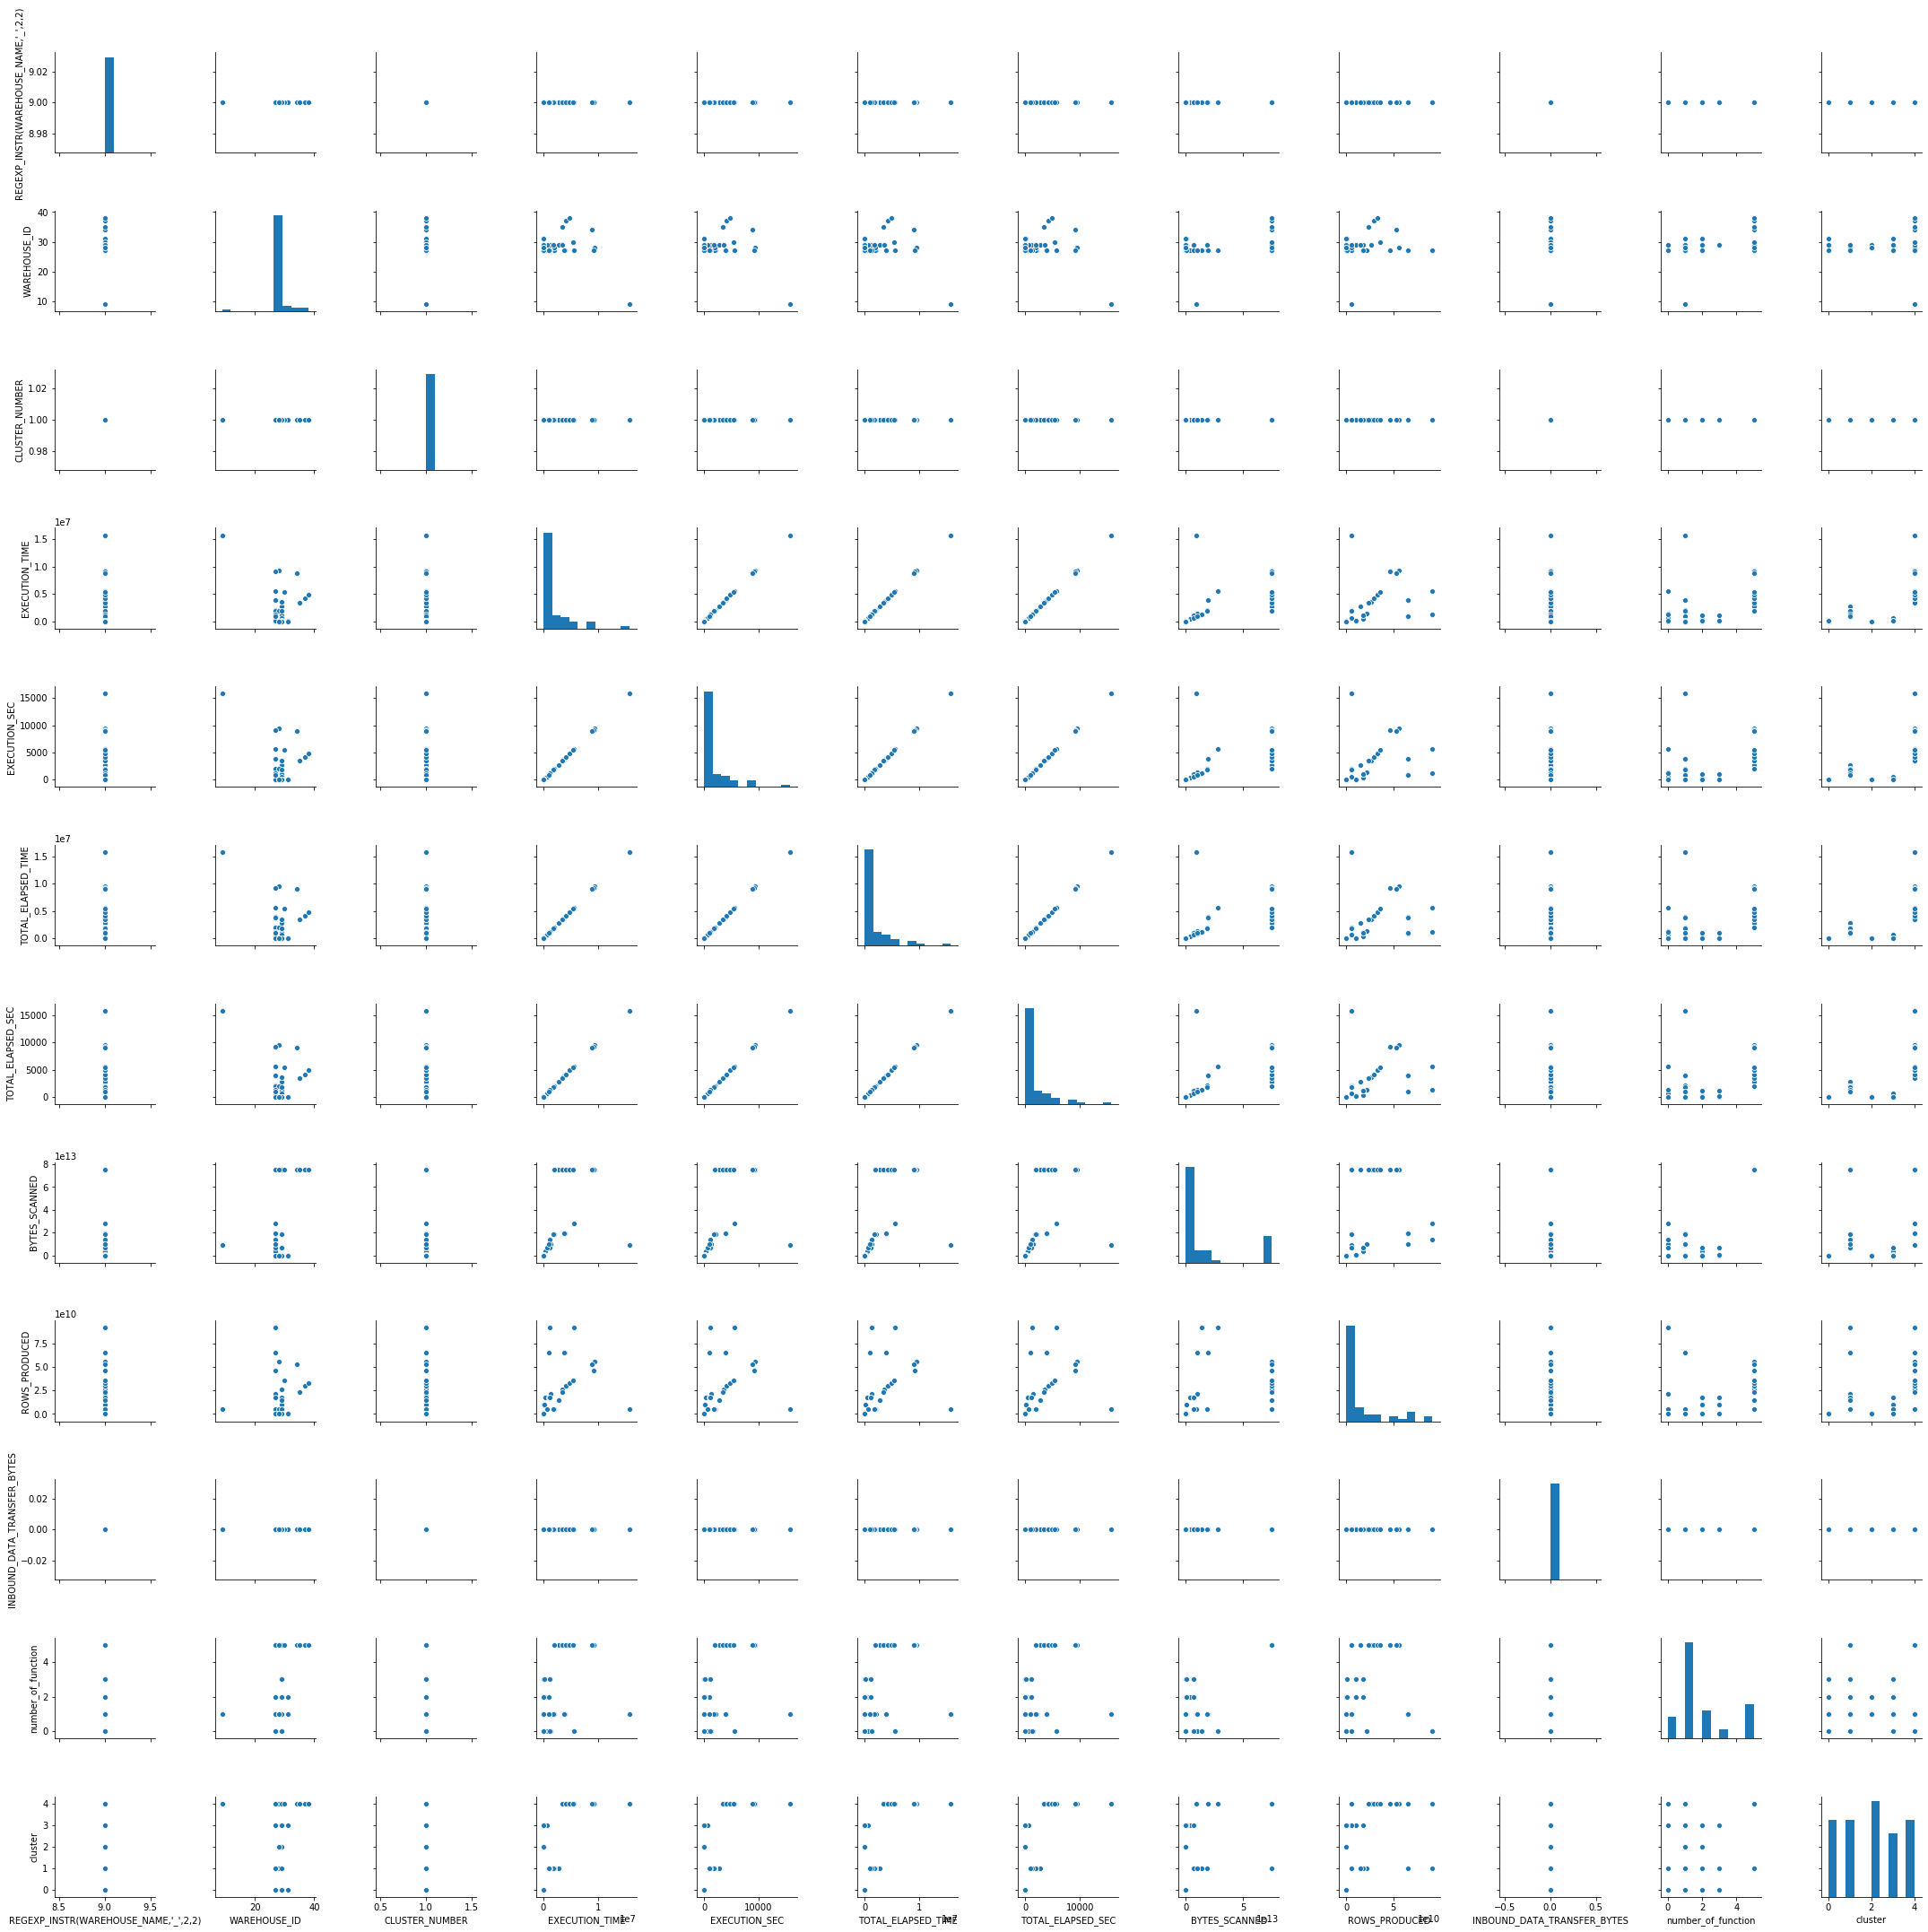

In [0]:
sns.pairplot(df_trans)
plt.show()

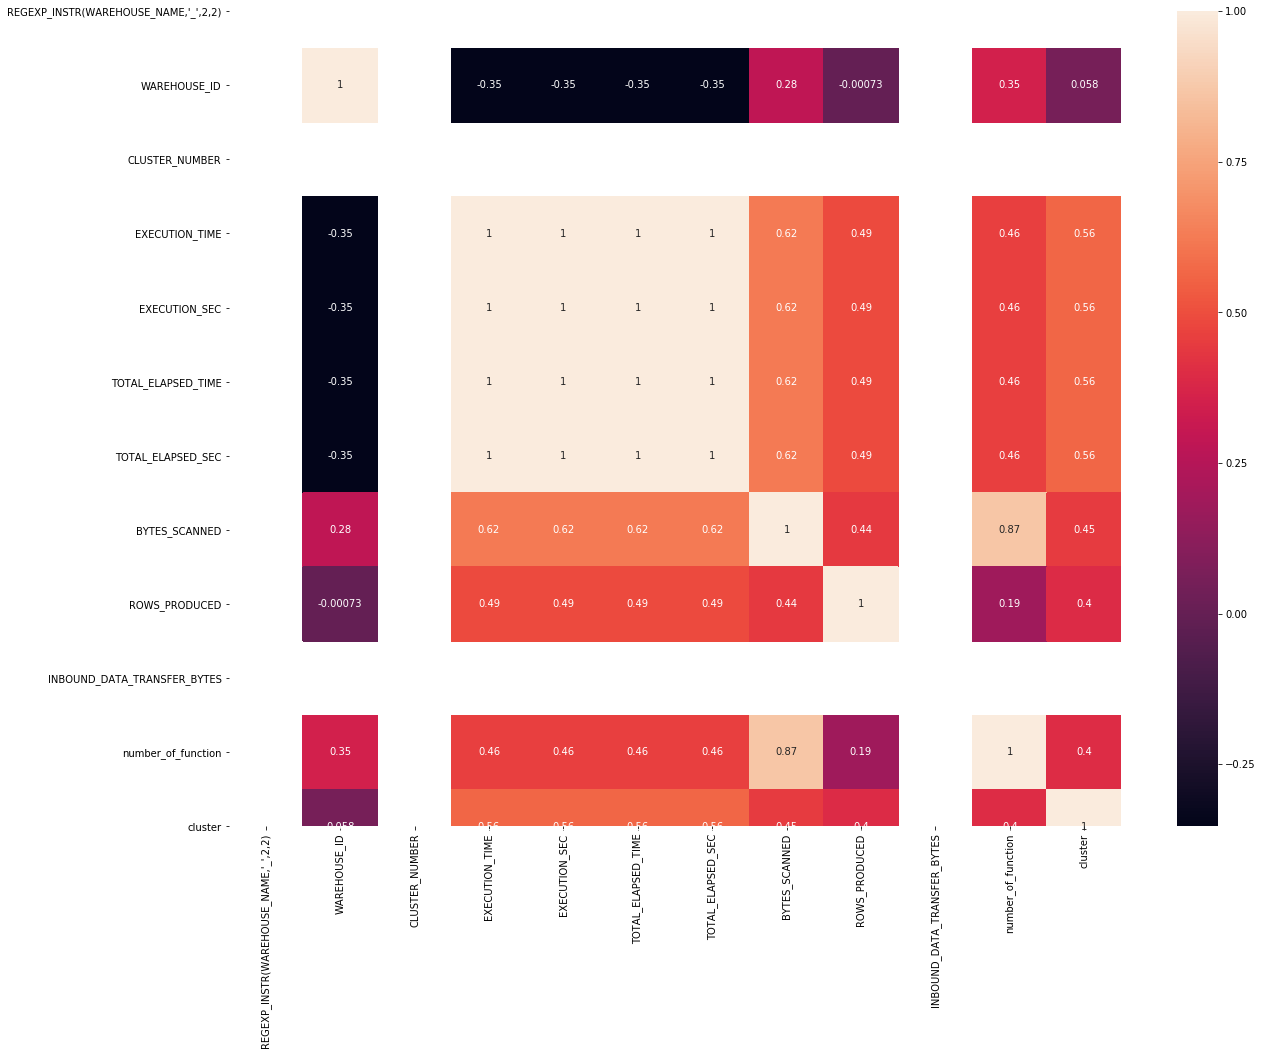

In [0]:
corr = df_trans.corr()
plt.subplots(figsize=(20,15))  
sns.heatmap(corr, annot=True)
plt.show()

In [0]:
cor_target = abs(corr["cluster"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

EXECUTION_TIME        0.564786
EXECUTION_SEC         0.564786
TOTAL_ELAPSED_TIME    0.564624
TOTAL_ELAPSED_SEC     0.564624
BYTES_SCANNED         0.446102
ROWS_PRODUCED         0.397059
number_of_function    0.398650
cluster               1.000000
Name: cluster, dtype: float64

In [0]:
df_trans[['EXECUTION_TIME','EXECUTION_SEC','TOTAL_ELAPSED_TIME','TOTAL_ELAPSED_SEC','BYTES_SCANNED','ROWS_PRODUCED','number_of_function','cluster']].to_excel('./data/My Drive/ML_training/SF_Workload_estimation_final.xlsx')

In [0]:
df_trans.loc[ df_trans.cluster == 0, 'instance_type' ] = 'm1'
df_trans.loc[ df_trans.cluster == 1, 'instance_type' ] = 'max'
df_trans.loc[ df_trans.cluster == 2, 'instance_type' ] = 'min'
df_trans.loc[ df_trans.cluster == 3, 'instance_type' ] = 'm2'
df_trans.loc[ df_trans.cluster == 4, 'instance_type' ] = 'm3'

In [0]:
df_trans

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function,cluster,instance_type
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2,min
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,INSERT,HIGH,3.710218e+10,1.000000e+07,0,1,3,m2
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2,min
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,INSERT,HIGH,1.225716e+11,1.000000e+09,0,1,3,m2
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,INSERT,HIGH,1.182197e+09,3.900000e+06,0,2,0,m1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,242,0.242,558,0.558,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,2,min
57,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,486,0.486,1345,1.345,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2,min
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,2,min
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,2,min
